# What factors are driving pay discrimination between men and women in your organization?

In [42]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

%matplotlib inline
plt.style.use('ggplot')

## Goals

In this case, we will setup a foundational understanding of statistics necessary for linear regression and then introduce linear regression starting with 2 parameters. We hope students will thoroughly understand the working components of a linear regression model such as interpreting the coefficients and understanding various metrics to properly evaluate the performance of the model.

## Introduction

**Business Context**. You are a data scientist in a large organization. Your company is undergoing an internal review of its hiring practices and employee compensation. In recent years, your firm has had low success in converting high-quality female candidates that it has wanted to hire. Management hypothesizes that this is due to possible pay discrimination and wants to figure out what is causing it.

**Business Problem.** As part of the internal review, the human resources department has approached you to specifically investigate the following question: <b>"On balance, are men paid more than women in your organization? If so, what is driving this gap?"</b>

**Analytical Context**. The human resources department has provided you with an employee database that contains information on various attributes such as performance, education, income, seniority, etc. We will use linear regression techniques on this dataset to solve the business problem described above. We will see how linear regression quantifies the correlation between the dependent variable (pay) and the independent variables (e.g. education, income, seniority, etc.)

The case is structured as follows: we will (1) perform exploratory data analysis to visually investigate the differences in pay; (2) use the observed insights to formally fit regression models; and finally (3) address the pay discrimination issue.

## Data Exploration

In [43]:
Data = pd.read_csv('glassdoordata.csv')

In [44]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


The available features are:
* **job title**: the title of the job (e.g. “Graphic Designer”, “Software Engineer”, etc);
* **gender**: male or female;
* **age**: age;
* **performance**: on a scale of 1 to 5, 1 being the lowest and 5 being the highest;
* **education**: different levels of education (e.g. "College", "PhD", "Masters", "Highschool");
* **department**: different departments in the organization (e.g. "Operations", "Management", etc);
* **seniority**: on a scale of 1 to 5, 1 being the lowest and 5 being the highest;
* **income, bonus**: both expressed in dollars

Since we are interested in total compensation, let's create a new column called <code>pay</code>:

In [45]:
Data['pay'] = Data['income'] + Data['bonus']

In [46]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


###  Exercise 1:

#### 1.1

Construct a boxplot comparing pay between men and women. What can you conclude?


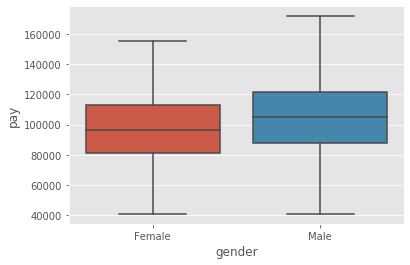

In [47]:
sns.boxplot(x = "gender", 
                y="pay", 
                data = Data,
               orient="vertical",
               showfliers=False,)

# sns.boxplot(x='gender', y = 'pay', data = Data) 
# #Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
# plt.title("Pay vs Gender");

**Answer**.

-----------

#### 1.2

Conduct a [$t$ - test](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/) on the difference in average pay between men and women. What can you conclude?


In [48]:
## A simple t test for difference of means
t2, p2 = stats.ttest_ind(Data.loc[Data['gender'] == 'Male', 'pay'],Data.loc[Data['gender'] == 'Female', 'pay'])
print("t = " + str(t2))
print("p = " + str(p2))

t = 5.407461816876623
p = 8.000016978237565e-08


**Answer**. 

-----------

#### 1.3

Construct a [boxplot](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/descriptive-statistics/box-plot/) of pay, with respect to the following attributes:  seniority, education, jobtitle and performance. Also do a scatterplot of pay vs. age. What patterns do you observe?

In [49]:
#Let us compute the average pay for men vs. women.
pay_by_gender = Data.groupby('gender')['pay']
pay_by_gender.mean()

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64

In [50]:
pay_by_gender.mean()['Male'] - pay_by_gender.mean()['Female']

8501.847374847363

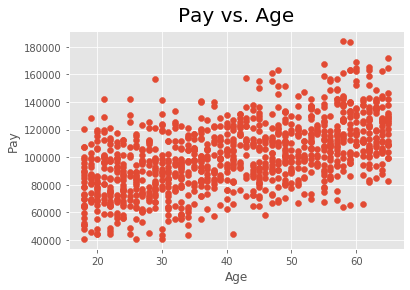

In [51]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

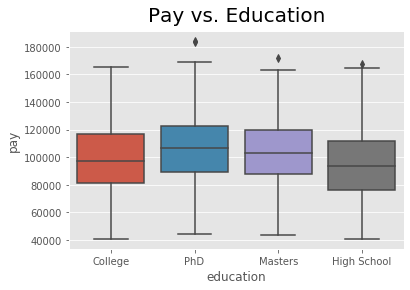

In [52]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

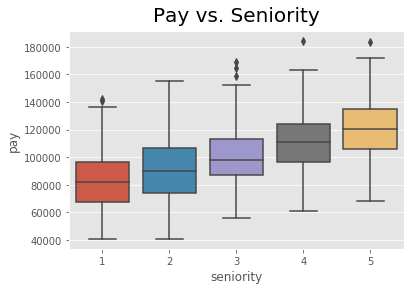

In [53]:
sns.boxplot(x='seniority', y = 'pay', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

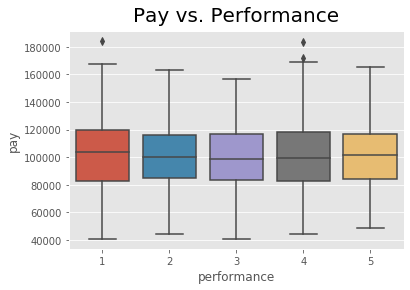

In [54]:
sns.boxplot(x='performance', y = 'pay', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

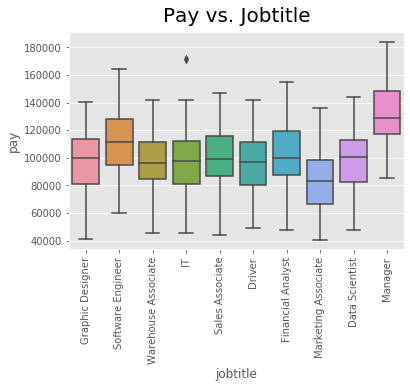

In [55]:
sns.boxplot(x='jobtitle', y = 'pay', data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

****Answer:****

----------

### Exercise 2:

Now, let's make the same plots as in Exercise 1.3, but additionally differentiate by gender. What patterns do you observe?


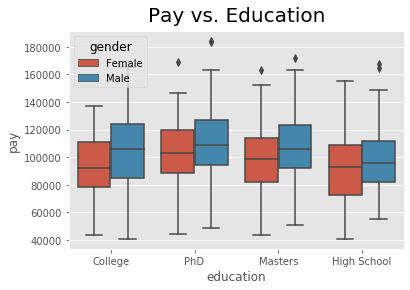

In [56]:
sns.boxplot(x='education', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

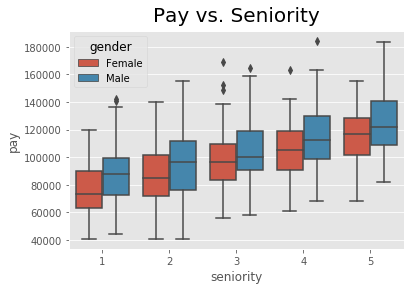

In [57]:
sns.boxplot(x='seniority', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

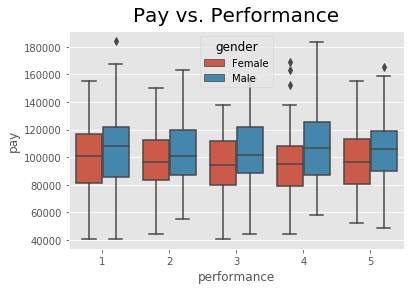

In [58]:
sns.boxplot(x='performance', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

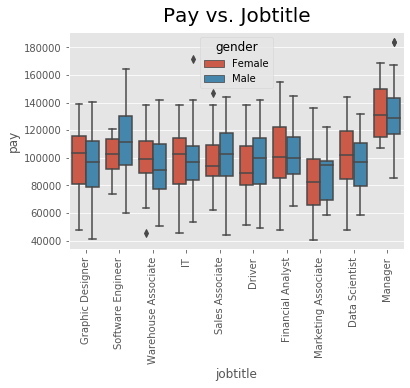

In [59]:
sns.boxplot(x='jobtitle', y = 'pay', hue = 'gender',data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

**Answer**. There is a significant variation of pay across some of the attributes. Pay increases with seniority. Among job titles, managers are paid relatively high on average. Marketing associates are paid much less. Pay vs. education is similar for all categories except for people with only a high school education. They are paid on average much less. There is a linear relationship between pay and age.

----------

### Exercise 3:

Consider the following statements:

I. Based on the boxplot and the table, the average salary for men is 8500 USD more than that of women in this organization.

II. Men are paid significantly more than women due solely to gender diffferences.

Which of the following conclusions about these statements is correct?

a. Both Statements I and II are correct.

b. Statement I is correct, but Statement II is not.

c. Statement I is not correct, but Statement II is.

d. Both Statements I and II are incorrect.

**Answer**.
Statement I is true just as the tables and plot show. However, we cannot conclude that Statement II is correct. This is because there might be other factors that contribute to the higher pay for men. For instance, the men in this data set might all be in senior positions, while most of the women are in junior positions. Pay usually increases with seniority. Thus if we do not account for seniority while calculating wage gap, we could be comparing apples to oranges

----------

## What are the variables that influence pay?

<p>As we discussed in Exercise 3 and also saw in the data exploration, even though there is a significant pay gap betwen the genders, there are also some other factors at work which are driving this difference. Thus, ignoring these factors while addressing pay discrimination could lead to wrong or misleading conclusions about how to go about addressing the issue.</p>

<p>How do we take into account the influence of the other variables on pay? What are these variables?
A good place to start is to take inspiration from our exploratory data analysis before. The only numerical variable in this dataset is age, so let's start with a scatter plot of pay vs. age:</p>

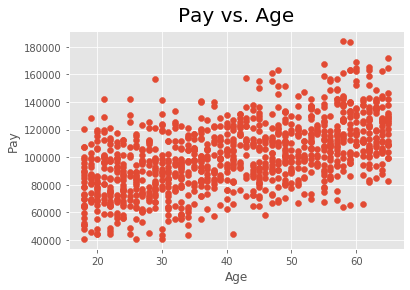

In [60]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay");

### Correlation measures the linear relationship between two variables
We see a linear relationship between pay and age. Pay seems to be positively <b>correlated</b> with age; i.e. the older someone is, the more they tend to get paid. Thus, it could be that there are more men in our dataset that are older and the pay difference between men and women we see could be a consequence of this. The quantity <b>correlation</b> measures how linear the relationship between two variables is. Guess the correlation between pay and age. 

### Guess the correlation

To get warmed up on the concept of correlation, here are some simulated scenarios. In each of these cases, guess the correlation:

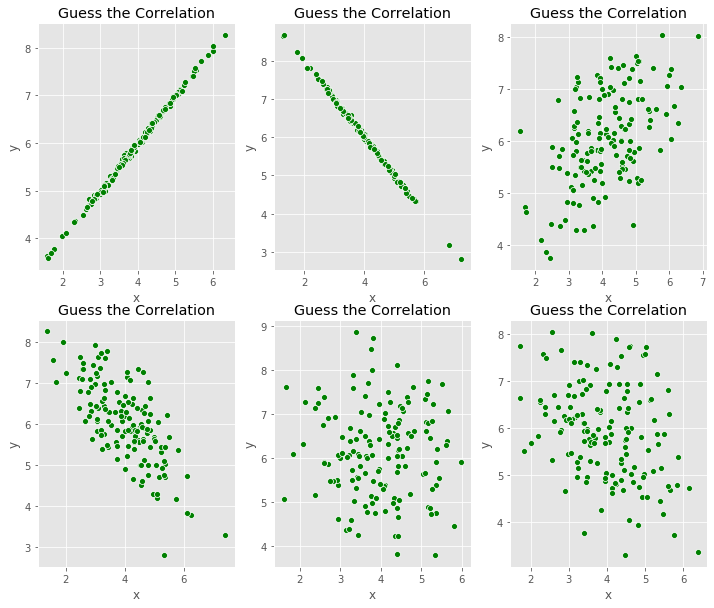

In [61]:
plt.figure(figsize=(12,10))
rho = [0.999, -0.999, 0.5, -0.7,0.001,-0.3]
cor_list = []
np.random.seed(10)
for i, r in enumerate(rho):
    plt.subplot(2,3,i+1)
    mean, cov = [4, 6], [(1, r), (r, 1)]
    x, y = np.random.multivariate_normal(mean, cov, 150).T
    ax = sns.scatterplot(x=x, y=y, color="g")
    cor_list.append(np.corrcoef(x,y)[0,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Guess the Correlation")

In [62]:
cor_list

[0.9990081442281223,
 -0.9992506121564404,
 0.5047051300834765,
 -0.7228982219723217,
 -0.04041125768713201,
 -0.32083184263386655]

### Question:

If the correlation between two variables is zero, then the two variables are unrelated. Is this true or false?

**Answer**. This is false. There could be non-linear relationships between the variables, and these may not be captured by correlation, which is a linear measure. In such cases, advanced models that capture non-linear relationships are required.

### Correlation matrix

To find the variables that have the greatest influence on pay, we can compute a <b>correlation matrix</b> which measures the pairwise correlations between any two variables:

In [63]:
corr_mat  = Data[['pay', 'age', 'seniority','performance']].corr()
corr_mat

,pay,age,seniority,performance
pay,1.000000,0.533715,0.530307,0.014155
age,0.533715,1.000000,-0.021414,-0.056875
seniority,0.530307,-0.021414,1.000000,-0.021127
performance,0.014155,-0.056875,-0.021127,1.000000


We can also visualize the [correlation matrix](https://www.displayr.com/what-is-a-correlation-matrix/) above as a heatmap:

Text(0.5, 1, 'Correlation Matrix')

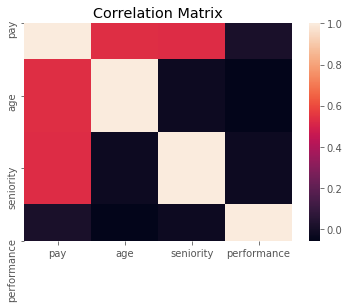

In [65]:
#sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
sns.heatmap(corr_mat)
plt.title("Correlation Matrix")

## Using linear models to account for variables correlated with pay

Once we identify some independent variables that are correlated with the dependent variable, a linear model can be used to capture this relationship quantitatively. A linear model does this by finding a line that [**best fits**](https://mathbits.com/MathBits/TISection/Statistics1/LineFit.htm) the data points:


Text(-15.075000000000003, 0.5, 'Pay')

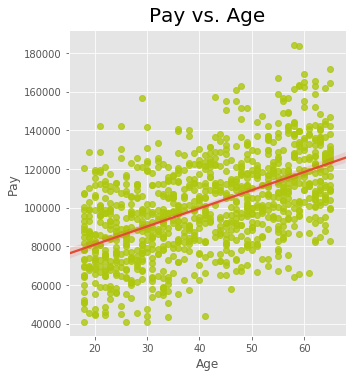

In [66]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay")

A line has two parameters – intercept ($\beta_0$) and slope ($\beta_1$). Thus a linear model for pay vs. age can be represented as
 $$ \mathrm{pay} = \beta_0 + \beta_1 \mathrm{age} + \mathrm{error}. $$

The interpretation of the coefficient $\beta_1$ is the following: an increase of one year in age will on average lead to a change of $\beta_1$ USD in pay. The intercept $\beta_0$ can be thought of as a sort of "baseline" pay.


### Interactive Visualization

The following interactive visualization gives you a few scenarios. Try to find the line of best fit in each scenario:

In [24]:

from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *

def run_scenario(scenario='1'):
    
    #determing which scenario this is
    if (scenario == '1'):
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000]
    elif (scenario=='2'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 26, 28, 30, 32, 34, 36, 38, 40, 20, 24]
        y_coor = [50000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 85000, 70000]
    elif (scenario=='3'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 32, 34, 36, 38, 40, 38, 36]
        y_coor = [50000, 53000, 60000, 80000, 75000, 88000, 90000, 92000, 50000, 52000]
    elif (scenario=='4'): 
        # defining x,y coordinates, scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 38, 40, 35, 22]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 90000, 92000, 55000, 90000]

    # defining linear scale for x,y axes
    x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
    y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

    # creating x,y axes using linear scales above
    ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
    ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

    #adding scatter marks
    names = []

    for i in range(0, len(x_coor)):
        name = str(x_coor[i]) + ', ' + str(y_coor[i])
        names.append(name)

    def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

    scatter_dots = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, tooltip=def_tt, unhovered_style={'opacity': 0.5})
#     scatter2 = Scatter(x=[x_coor[1]], y=[y_coor[1]], scales={'x': x_sc, 'y': y_sc}, enable_move=True)

    # defining in regression line
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_x_squared = 0
    sum_y_squared = 0
    n = len(x_coor)

    for i in range(0, len(x_coor)):
        sum_x += x_coor[i]
        sum_y += y_coor[i]
        sum_xy += sum_x * sum_y
        sum_x_squared += sum_x * sum_x
        sum_y_squared += sum_y * sum_y


    a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
    b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

    y_hat_values = []

    for x in x_coor:
        new_y_val = a + (b * x)
        y_hat_values.append(new_y_val)

    regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'], visible=False)

    #user interaction, drawing a line

    user_line_x = [19, 40]
    user_line_y = [60000, 60000]

    starting_user_line = Lines(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
    
    scatter = Scatter(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, unhovered_style={'opacity': 0.5}, enable_move=True, colors=['black'])

    #create figures and render
    fig = Figure(marks=[scatter_dots, scatter, starting_user_line, regression_line], axes=[ax_x, ax_y], title="Find the Regression Line of Best Fit")
    

    #add in dropdown menu
    dropdown = widgets.Dropdown(
        options=['1', '2', '3', '4'],
        value=scenario,
        description='Scenario:',
        disabled=False,
    )

    out = Output()
    display(out)
    
    def handler(x):
        print('hi')
    
    @out.capture()
    def observe_scatter_x_y(point, change):
        
        
        x_array = point.x
        y_array = point.y
        find_change_x = change['point']['x']
        find_change_y = change['point']['y']
        hovered_point = point.hovered_point
        
        
        
        if (hovered_point == 0):
            starting_user_line.set_trait('x', [find_change_x, x_array[1]]) 
            starting_user_line.set_trait('y', [find_change_y, y_array[1]])
#             starting_user_line.y[0] = find_change_y
#             starting_user_line.x[0] = starting_user_line.x.pop(0)
#             starting_user_line.y = starting_user_line.y.pop(0)
#             starting_user_line.x = starting_user_line.x.insert(0, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(0, find_change_y)
        elif (hovered_point == 1):
            starting_user_line.set_trait('x', [x_array[0], find_change_x]) 
            starting_user_line.set_trait('y', [y_array[0], find_change_y])
#             starting_user_line.x = starting_user_line.x.pop(1)
#             starting_user_line.y = starting_user_line.y.pop(1)
#             starting_user_line.x = starting_user_line.x.insert(1, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(1, find_change_y)
            
        
        
        
#         if change['name'] == 'x':
#             line.x = line.x + change['new'] - change['old']
#         else:
#             line.y = line.y + change['new'] - change['old']
    
    scatter.on_drag(observe_scatter_x_y)

    @out.capture()
    def on_dropdown_change(b):
        fig.close()
        button.close()
        dropdown.close()
        run_scenario(dropdown.value)
       
    dropdown.observe(on_dropdown_change, 'value')

    #add clicking action for submit
    button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

    def on_button_clicked(b):
        regression_line.set_trait('visible', True)

    button.on_click(on_button_clicked)
    
    box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

    box = Box(children=[button], layout=box_layout)

    display(dropdown, fig, box)

run_scenario()


Output()

Dropdown(description='Scenario:', options=('1', '2', '3', '4'), value='1')

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

### Residuals

The [residual](https://www.displayr.com/learn-what-are-residuals/) represents the difference between the actual observation and the one predicted by the linear regression line, as shown below:

Instructions:
    - Hover over the data points and you will see their (x,y) coordinates
    - Select (by clicking) the point you believe to have the largest residual
    - When you have selected, click 'See Answer' to see the result

In [25]:
from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *


# defining x,y coordinates, scenario 1
x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 39]
y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 52000]

# defining linear scale for x,y axes
x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

# creating x,y axes using linear scales above
ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

#adding scatter marks
names = []

for i in range(0, len(x_coor)):
    name = str(x_coor[i]) + ', ' + str(y_coor[i])
    names.append(name)

def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

scatter = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, opacity=[0.5], tooltip=def_tt, selected_style={'fill':'red', 'stroke': 'red'}, selected=[5])

out = Output()
display(out)


@out.capture()
def on_scatter_click(marks, dot):
    marks.set_trait('selected', [dot['data']['index']])
    
scatter.on_element_click(on_scatter_click)

# defining in regression line
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_squared = 0
sum_y_squared = 0
n = len(x_coor)

for i in range(0, len(x_coor)):
    sum_x += x_coor[i]
    sum_y += y_coor[i]
    sum_xy += sum_x * sum_y
    sum_x_squared += sum_x * sum_x
    sum_y_squared += sum_y * sum_y


a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

y_hat_values = []

for x in x_coor:
    new_y_val = a + (b * x)
    y_hat_values.append(new_y_val)

regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'])


#create figures and render
fig = Figure(marks=[scatter, regression_line], axes=[ax_x, ax_y], title='Find the Largest Residual',)


#add clicking action for submit
button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

@out.capture()
def on_button_clicked(b):
    answer = 12
    scatter.set_trait('selected', [answer])
    residual_line=Lines(x=[x_coor[answer], x_coor[answer]], y=[y_coor[answer], y_hat_values[answer]], scales={'x': x_sc, 'y': y_sc}, colors=['red'])
    fig.set_trait('marks', [scatter, regression_line, residual_line])
    

button.on_click(on_button_clicked)

box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

box = Box(children=[button], layout=box_layout)

display(fig, box)

Output()

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

## Interpreting the output of a linear model

The linear model of pay vs. age can be fit as follows:

In [26]:
model1 = 'pay~age'
lm1   = sm.ols(formula = model1, data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           1.04e-74
Time:                        20:40:08   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

### What should we focus on in the regression table? 
Although the output table above contains a lot of information, we only need to focus on a small number of quantities.
These are the coefficients (the estimates of $\beta_0$ and $\beta_1$), as well as their $p$- and $R$-squared values.

### Coefficients
The intercept $\beta_0$ is about 62060 USD. This can be thought of as the baseline pay. (Frequently, the intercept does not have a meaningful interpretation – that is okay.) The slope (the coefficient $\beta_1$ for the age) is 939.25. The interpretation of this coefficient is as explained before: if an employee becomes one year older, his or her pay is expected to increase by 939.25 USD on average. 

It is important to note that how we clean/impute data before modeling will have huge effects on the coefficients you get. A simple example is if we arbitrarily convert all missing values to the mean of that parameter. This will lead to a completely different coefficient than if we used $k$ - nearest neighbors imputation. This is why it is so important to carefully and deliberately choose an appropriate imputation method when dealing with missing or incorrect data.

### $p$-values
The null hypothesis we are testing here is 
$$ H_0:  \beta_1 = 0 $$ 
and the alternative is
$$ H_a: \beta_1 \neq 0.$$
The [p-value](https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8) of $\beta_1$ (given under the column: $"P>|t|"$) is 0.000.  Thus, it is statistically significant at the 0.05 level, and we reject the null hypothesis. This implies that age does explain some of the differences in pay.

There is no perfect or exact way of setting a statisically significant $p$ - value threshold. It really depends on your needs as a data professional. $p$ - values are used to assess how accurate we think a specific coefficient is. How certain do you need your interpretation of your coefficients to be? Generally, 0.05 is a common heuristic but it is not a hard-line number.

## $R$-squared

One of the key quantities that should be paid attention to while interpreting a regression table is the quantity
[$R$-squared](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit). Note that the table shows $R$-squared and adjusted $R$-squared. We will focus on $R$-squared. This quantity is always going to be between 0 and 1. For the pay vs. age model, this quantity is 0.285 = 28.5%. In this organization, there is a large variation in pay – different employees are paid different amounts.

An $R$-squared of 28.5% in this linear model means that this observed variation in pay is not due to random chance; rather, the age factor systematically explains 28.5% of this variation in pay. The higher the $R$-squared, the higher the percentage of observed variation that can be explained by the model. Since <code>model1</code> only explains about 28.5% of the variation, this motivates us to investigate if factors other than age can be used to explain the pay differences.

### Relation between correlation and $R$-squared

In [27]:
corr_age_pay = np.corrcoef(Data['pay'],Data['age'])[0,1]
corr_age_pay*corr_age_pay

0.28485128851108327

### Geometric interpretation of $R$-Squared
The formula for $R$-squared is the following:
  $$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$
Here [RSS](https://gerardnico.com/data_mining/rss) and [TSS](https://gerardnico.com/data_mining/tss) denote the Residual and Total Sum of Squares respectively. To understand the above
formula carefully, let us plot pay vs. age again. 

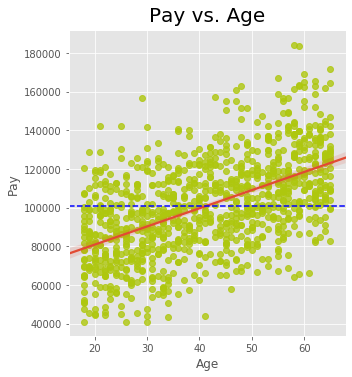

In [28]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.axhline(Data['pay'].mean(), ls='--',color = 'b')
plt.xlabel("Age")
plt.ylabel("Pay");

Consider the naive <code>model0</code> given by
 $$ \mathrm{pay} = \beta_0 + \mathrm{error} $$
The best guess for $\beta_0$ is just the average pay. This is given by the blue line. The sum of the squares of the residuals here is called the Total Sum of Squares (TSS).
R-squared measures how well the regression line of <code>model1</code> (pay vs. age) given by the red line explains the observed variation as compared to <code>model0</code>. The sum of residual squares for this model is the RSS.

### Calculating $R$-Squared by writing code

In [29]:
# you can 'peek' inside the object lm1 using the dir command
dir(lm1)
# for instance if you want to know what the fitted values are
## lm.fittedvalues

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [30]:
## Write code to find residuals from fitted values
res = Data['pay'] - lm1.fittedvalues
res[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [31]:
## check if this is the same as that stored in lm1.resid
lm1.resid[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [32]:
# The mean for pay 
mean_pay = Data['pay'].mean()

## The total sum of squares:
TSS = sum((Data['pay'] - mean_pay)*(Data['pay'] - mean_pay))
TSS

## Residual sum of squares
RSS = sum(res*res)

In [33]:
R_squared = (TSS - RSS)/TSS
R_squared

0.28485128851108454

## Looking at age and gender: Categorical variables

Now that we have seen that age explains some of the relationship with pay, let us consider a model in which we take age and gender into account simultaneously. Age is a numeric variable (e.g., 26.5, 32). In contrast, gender takes only two values – male and female. Such variables are called <b>categorical variables</b>. The way we interpret the coefficients of factor variables in the linear model is slightly different from those of numeric variables:

In [34]:
model2 = 'pay~age + gender'
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           8.10e-84
Time:                        20:40:27   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

The interpretation of the coefficient of age is the same as before: if age increases by one year, the pay is expected to increase by 948.5 USD. Now, focus on the coefficient of gender. It shows male (T.male) only, because the category female is taken as the default category. (Note that the choice of default category doesn't matter – we could easily have chosen to make male the default category and hence the coefficient for gender would be T.female.) The coefficient 9279.3180 is interpreted as follows: for employees of the same age, on average, men make 9279.3180 USD more than women.

But we still haven't satisfactorily answered our main question yet. So far, we have only accounted for age in addition to gender for explaining pay gaps. There are still a few more factors that could affect pay. We consider education next. The following plot shows that employees with at least a college education are paid more:

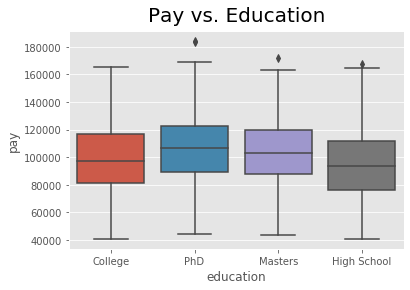

In [35]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

### Exercise 4:

Give the code for fitting a linear model with pay as the dependent variable and age, gender, and education as the independent variables. Compare the $R$-squared of this with that of <code>model2</code>. What conclusions can we make?


In [36]:
model3 = 'pay~age + gender+education'
lm3    = sm.ols(formula = model3, data = Data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.7
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           8.74e-89
Time:                        20:40:32   Log-Likelihood:                -11340.
No. Observations:                1000   AIC:                         2.269e+04
Df Residuals:                     994   BIC:                         2.272e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Answer**.

Slopes interpretation:

After accounting for education and age men earn 8789 than female.
After accounting for age and gender, having just high school decresases the salary by 3906 compared to college (college is the baseline cathegory)

----------

### Exercise 5:

Which is of the following statements is false? After accounting for age and gender:

(a) Employees with college education are paid 3906 USD more on average than those with just a high school degree.

(b) Employees with just a high school degree are paid 7500.1 USD less on average compared to those with a masters degree.

(c) Employees with a PhD degree earn on average 2556.20 USD more than those with a masters degree.

(d) Employees with a masters degree earn on average 8077.3 USD more than those with just a high school degree.

**Answer**.

----------

## Integrated model accounting for all variables

Let us account for all the other factors that could explain pay gaps at once. What can you conclude?:

In [37]:
model4 = 'pay~jobtitle + age + performance + education + department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:40:36   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Exercise 6:

Taking all of the factors in to account as in <code>model4</code>, which of the following jobs pay the highest?

(a) Marketing Associate

(b) Software Engineer

(c) Manager

(d) Graphic Designer

**Answer**.

----------

## Revisiting the question of pay discrimination

Now that we have looked at and accounted for various attributes that are correlated with pay, let us now revisit the question of what is driving pay discrimination. <code>model4</code>, which accounts for all of the variables in the dataset, has an $R$-squared of 84.1%. This is definitely a vast improvement from <code>model1</code> (pay vs. age) which has an $R$-squared of 28.5%. Thus compared to <code>model1</code>, <code>model4</code> explains 84.1% - 28.5% = 55.6% more of the variation seen in the data.

### Exercise 7:

Based on the analysis we have done so far (<code>model1</code> - <code>model4</code>), consider the following statements.

I. After accounting for job title, education, performance and age, the proportion of pay difference attributable solely to gender is small.

II. There is evidence that pay discrimination between men and women is due solely to gender.

III. There is reason to believe to that there could be a disproportionate amount of women in lower paying jobs 
such as marketing, while there could be more men in higher paying jobs, such as manager.

Choose the correct answer:

(a) I is correct, II and III are incorrect.

(b) II is correct, I and III are incorrect.

(c) I is incorrect, II and III are correct.

(d) I and III are correct, II is incorrect.

**Answer.**

----------

## Investigating the distribution of gender across seniority and job types

Motivated by Exercise 7, let's look into how women are distributed across various factors. The following plot shows that men and women are similarly distributed by seniority:

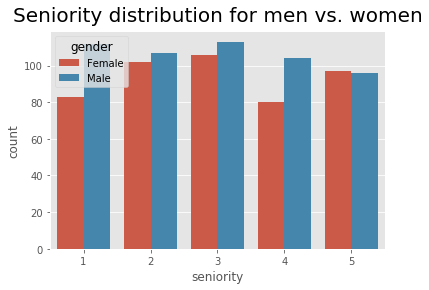

In [38]:
sns.countplot(x='seniority', hue = 'gender', data = Data) 
plt.title("Seniority distribution for men vs. women", fontsize=20, verticalalignment='bottom');

However, looking at the distribution of women across various job types tells a different story. From the following barplot, we see that women are disproportionately underrepresented in software engineering and managerial roles. Also, women are disproportionately overrepresented in the marketing associate job title:

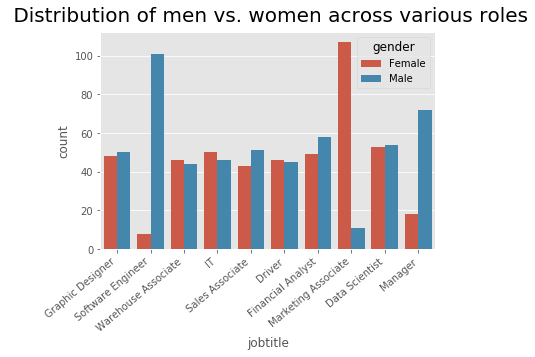

In [39]:
pl = sns.countplot(x="jobtitle", hue= "gender", data= Data)
pl.set_xticklabels(pl.get_xticklabels(), rotation=40, ha="right");
plt.title(" Distribution of men vs. women across various roles", fontsize=20, verticalalignment='bottom');

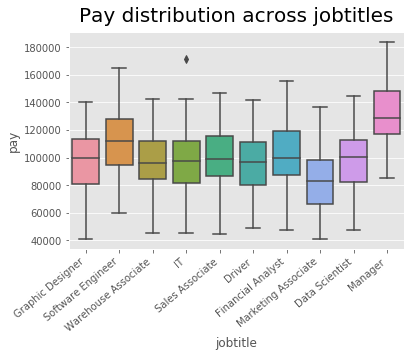

In [40]:
pl2 = sns.boxplot(x="jobtitle", y = "pay", data = Data)
pl2.set_xticklabels(pl2.get_xticklabels(), rotation=40, ha="right");
plt.title("Pay distribution across jobtitles", fontsize=20, verticalalignment='bottom');

The above chart shows that manager and marketing associate have the highest and lowest average salaries, respectively. We also see from the previous plot that the proportion of women are the lowest and the highest in manager and marketing associate roles, respectively. This visually explains the output of our regression model about why there is no evidence of pay discrepancy after taking into account all of these factors.

## Conclusions

We used the techniques of linear regression to determine whether or not there existed gender-based pay discrimination within your organization. We modeled the effect of various independent variables (in this case seniority, age, performance, and job title) to explain the observed variation in a dependent variable (in this case, pay). We looked at the $R$-squared statistic of our linear models to help us measure what percentage of observed variation in pay was explained by the independent variables.

We saw that the difference in average salary between men and women is about 8500 USD in this data. However, this difference became 400 USD and is statistically indistinguishable ($p$-value = 0.584) from zero after controlling for the other factors correlated with pay. However, further exploration of the data suggested that women are disproportionately overrepresented in the lowest-paying jobs, while men are disproportionately overrepresented in the highest-paying jobs.

Thus, an investigation into the hiring, promotion, and job placement practices of men and women is warranted. In your report to the human resources department, you should ask them to look into the following questions:

1. Are women choosing to or being forced to take lower paying jobs?
2. Are women being discriminated against in hiring processes for higher-paying jobs?

## Takeaways

In this case, you learned how to leverage your skills in exploratory data analysis to build an effective linear model that accounted for several factors related to the outcome of interest (pay). Crucially, we learned that:

1. Looking directly at the relationship between the outcome of interest and the independent variable of interest is not enough – there may be several confounding factors.
2. Conducting EDA before doing any model-building is important to discover and account for these confounding factors that could be driving the differences in the outcome of interest.
3. $R$-squared is an important quantity that explains how well your model explained the observed variation. It can be used to compare different models.
4. Analyzing the coefficients of a linear regression to gain an understanding of how the various parameters impact the final output is extremely important - this interpretability is a key part of translating data to business action.

These days, media constantly shines a spotlight on more advanced machine learning algorithms such as neural networks. It is important for you to recognize the immense value of linear regression, particularly for its inference capabilities and interpretability. While neural networks may outperform linear regression in certain tasks, it is much more of a black box and understanding how the data is causing the model to react is extremely important in most business scenarios.